In [1]:
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

In [2]:
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'
df = pd.read_csv(url, float_precision='legacy')

In [3]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


#### Task 1 : Use matplotlib to create a scatter plot

(<Figure size 792x648 with 1 Axes>, <AxesSubplot:>)

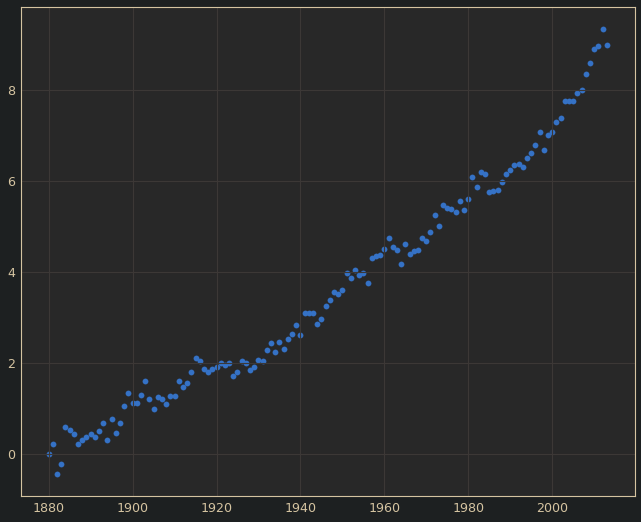

In [4]:
def draw_scatter_plot():
    # Draw scatter plot
    fig, ax = plt.subplots(figsize=(11, 9))
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    plt.scatter(x, y)
    return fig, ax
draw_scatter_plot()

#### Task 2 : Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot.

(<Figure size 792x648 with 1 Axes>, <AxesSubplot:>)

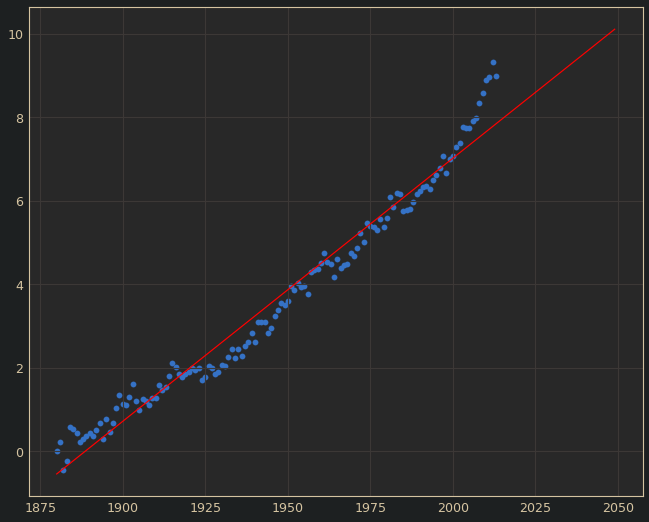

In [5]:
def draw_first_best_fit_line():
    fig, ax = draw_scatter_plot()
    x = df['Year']
    y = df['CSIRO Adjusted Sea Level']
    slope, int1, r, p, std = linregress(x, y)
    pred_x = list(range(1880, 2050))
    pred_y = []
    for i in pred_x:
        pred_y.append(slope * i + int1)
    plt.plot(pred_x, pred_y, "red")
    return fig, ax
draw_first_best_fit_line()

#### Task 3 : Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.

<AxesSubplot:title={'center':'Rise in Sea Level'}, xlabel='Year', ylabel='Sea Level (inches)'>

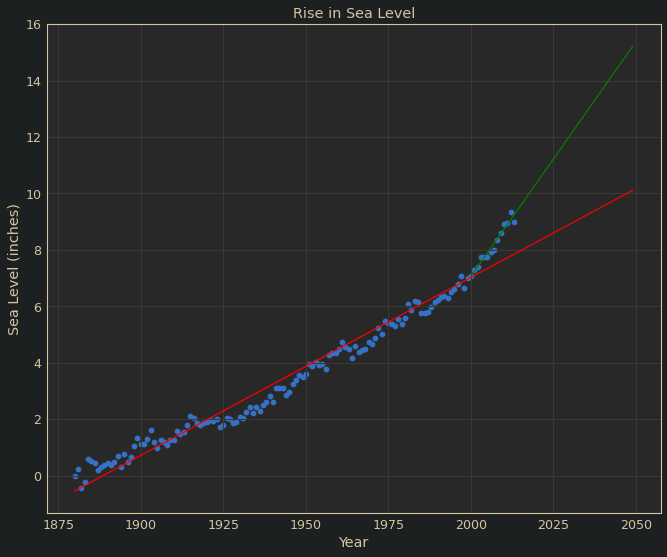

In [6]:
def draw_prediction_line():
    # Draw scatter plot
    fig, ax = draw_first_best_fit_line()
    x = df.loc[df['Year'] >= 2000]['Year']
    y = df.loc[df['Year'] >= 2000]['CSIRO Adjusted Sea Level']
    slope2, int2, r2, p2, std2 = linregress(x, y)
    pred_x2 = list(range(2000, 2050))
    pred_y2 = []
    for i in pred_x2:
        pred_y2.append(slope2 * i + int2)
    plt.plot(pred_x2, pred_y2, "green")
    # Create second line of best fit
    # Add labels and title
    ax.set_xlabel("Year")
    ax.set_ylabel("Sea Level (inches)")
    ax.set_title("Rise in Sea Level")
    
    # Save plot
    plt.savefig('sea_level_plot.png') 
    return plt.gca()
draw_prediction_line()